## Import Libraries

Test Cell for commit

In [62]:
## importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [515]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve, \
                            confusion_matrix

## Read in data

In [278]:
df = pd.read_csv("../datasets/Travel.csv")

In [280]:
df.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


## Data Cleaning
### Handling Missing values
1. Handling Missing values
2. Handling Duplicates
3. Check data type
4. Understand the dataset

In [283]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

## Check all fields + dataframe manipulation

In [286]:
df.dtypes

CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

In [288]:
df.dtypes.value_counts()

int64      7
float64    7
object     6
Name: count, dtype: int64

In [290]:
## Get the numeric columns
numeric_cols = df.select_dtypes(include=["number"]).columns
non_numeric_cols = df.select_dtypes(exclude=["number"]).columns

In [292]:
numeric_cols

Index(['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object')

In [294]:
non_numeric_cols

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

### Get value breakdown of each categorical variable

The breakdown for TypeofContact is: 
TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64


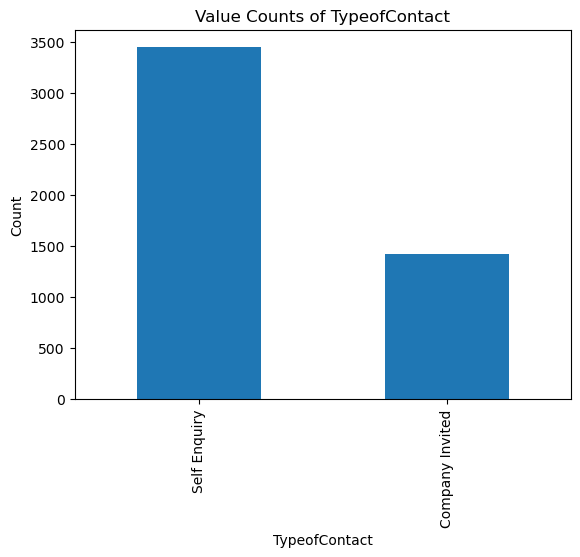

----------- 


The breakdown for Occupation is: 
Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64


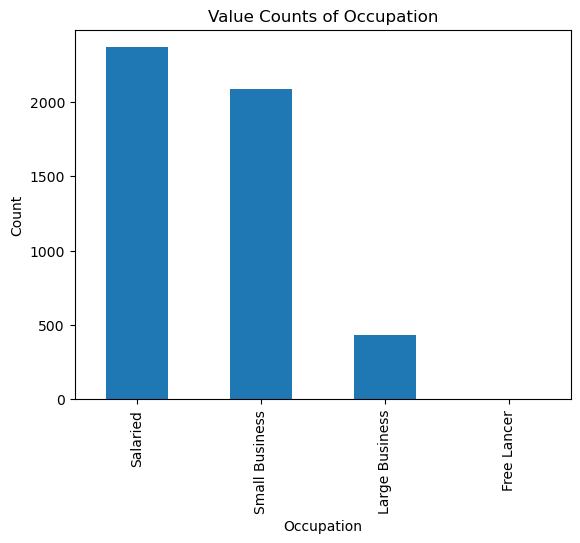

----------- 


The breakdown for Gender is: 
Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64


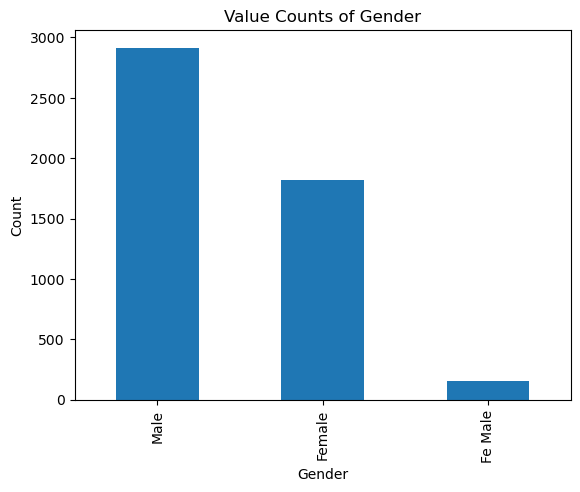

----------- 


The breakdown for ProductPitched is: 
ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64


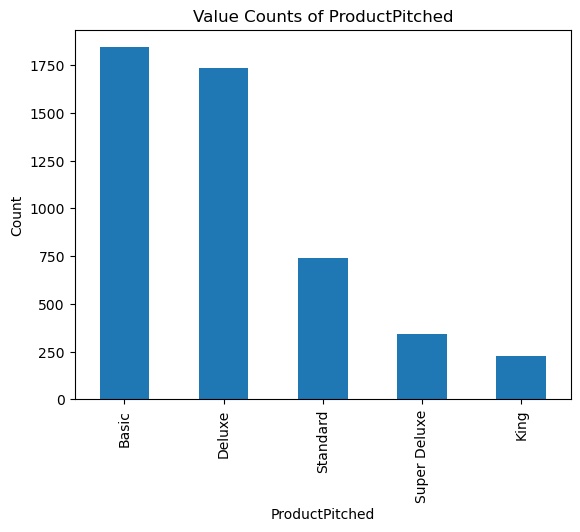

----------- 


The breakdown for MaritalStatus is: 
MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64


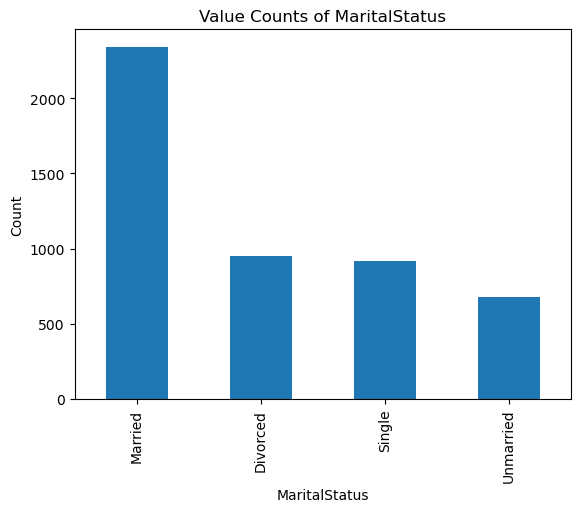

----------- 


The breakdown for Designation is: 
Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64


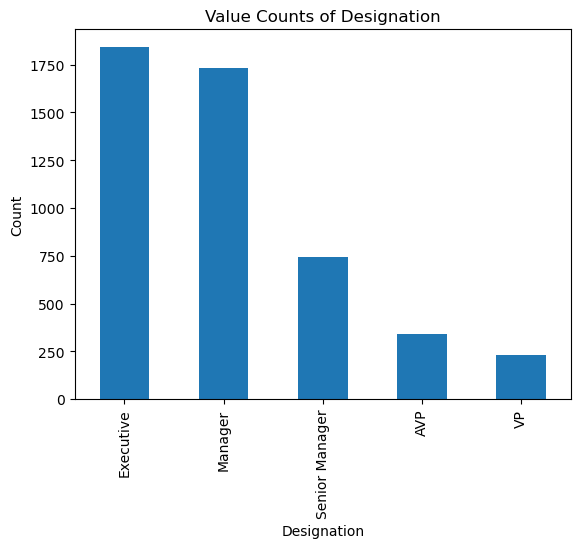

----------- 




In [297]:
for c in non_numeric_cols:
    print(f"The breakdown for {c} is: ") 
    print(df[c].value_counts())
    df_to_plot = df[c].value_counts()
    df[c].value_counts().plot(kind="bar")
    plt.xlabel(f"{c}")
    plt.ylabel('Count')
    plt.title(f"Value Counts of {c}")
    plt.show()
    print("----------- \n\n")

### Correct issue with mislabeled values -- Gender and Marital Status

In [300]:
df['Gender'] = df['Gender'].replace('Fe Male','Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single','Unmarried')

In [302]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [304]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [306]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [308]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [311]:
## Check Misssing Values
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [313]:
features_with_na

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [315]:
for features in df.columns:
    if df[features].isnull().sum()>=1:
        print(features)

Age
TypeofContact
DurationOfPitch
NumberOfFollowups
PreferredPropertyStar
NumberOfTrips
NumberOfChildrenVisiting
MonthlyIncome


In [317]:
# statistics on numerical columns (Null cols)
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


## Imputing Null values
1. Impute Median value for Age column
2. Impute Mode for Type of Contract
3. Impute Median for Duration of Pitch
4. Impute Mode for NumberofFollowup as it is Discrete feature
5. Impute Mode for PreferredPropertyStar
6. Impute Median for NumberofTrips
7. Impute Mode for NumberOfChildrenVisiting
8. Impute Median for MonthlyIncome

In [320]:
#Age
df.Age.fillna(df.Age.median(), inplace=True)

#TypeofContract
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)

#DurationOfPitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)

#NumberOfFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)

#PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

#NumberOfTrips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)

#NumberOfChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)

#MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)

## Drop customer ID column

In [323]:
df.drop('CustomerID', inplace=True, axis=1)

## Feature Engineering

In [326]:
# create new column for feature
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1, inplace=True)

In [328]:
## get all the numeric features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 12


In [330]:
##categorical features
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 6


In [332]:
## Discrete features
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 9


In [334]:
## coontinuous features
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 3


## Train test split 

In [337]:
from sklearn.model_selection import train_test_split
X = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']

In [339]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [341]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: ProdTaken, dtype: int64

In [343]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [447]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((3910, 17), (978, 17))

In [449]:
pd.DataFrame(X_train).describe()

,Age,CityTier,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,MonthlyIncome,TotalVisiting
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,37.422762,1.662916,15.351918,3.717647,3.581074,3.233760,0.285678,3.067263,0.619949,23547.939898,4.092072
std,9.010187,0.919046,8.186396,0.998628,0.801284,1.830244,0.451794,1.372473,0.485461,5261.534303,1.410850
min,18.000000,1.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1000.000000,1.000000
25%,31.000000,1.000000,9.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,20561.250000,3.000000
50%,36.000000,1.000000,13.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,22347.000000,4.000000
75%,43.000000,3.000000,19.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,25332.500000,5.000000
max,61.000000,3.000000,127.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,98678.000000,7.000000


In [451]:
pd.DataFrame(X_train).isnull().sum()

Age                       0
TypeofContact             0
CityTier                  0
DurationOfPitch           0
Occupation                0
Gender                    0
NumberOfFollowups         0
ProductPitched            0
PreferredPropertyStar     0
MaritalStatus             0
NumberOfTrips             0
Passport                  0
PitchSatisfactionScore    0
OwnCar                    0
Designation               0
MonthlyIncome             0
TotalVisiting             0
dtype: int64

In [453]:
pd.DataFrame(X_test).describe()

,Age,CityTier,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,MonthlyIncome,TotalVisiting
count,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000
mean,38.044990,1.619632,15.406953,3.685072,3.565440,3.213701,0.311861,3.121677,0.621677,23604.114519,4.080777
std,9.461987,0.906309,8.820166,0.996926,0.779938,1.793408,0.463490,1.338555,0.485217,5245.604752,1.430269
min,18.000000,1.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,16051.000000,1.000000
25%,31.000000,1.000000,9.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,20384.000000,3.000000
50%,36.000000,1.000000,13.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,22347.000000,4.000000
75%,45.000000,3.000000,19.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,25729.250000,5.000000
max,61.000000,3.000000,126.000000,6.000000,5.000000,8.000000,1.000000,5.000000,1.000000,38677.000000,7.000000


In [455]:
pd.DataFrame(X_test).isnull().sum()

Age                       0
TypeofContact             0
CityTier                  0
DurationOfPitch           0
Occupation                0
Gender                    0
NumberOfFollowups         0
ProductPitched            0
PreferredPropertyStar     0
MaritalStatus             0
NumberOfTrips             0
Passport                  0
PitchSatisfactionScore    0
OwnCar                    0
Designation               0
MonthlyIncome             0
TotalVisiting             0
dtype: int64

In [457]:
class_0_train = np.round((y_train.value_counts()[0] / (y_train.value_counts()[0] + y_train.value_counts()[1])) * 100.0,2)
class_0_test = np.round((y_test.value_counts()[0] / (y_test.value_counts()[0] + y_test.value_counts()[1])) * 100.0,2)

print(f"Training dataset: Class 0 = {class_0_train}% \nTesting dataset: Class 0 = {class_0_test}%") 

Training dataset: Class 0 = 81.36% 
Testing dataset: Class 0 = 80.47%


### Create Pipeline for Just 1 Model

In [497]:
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

In [499]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [501]:
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

pipe = Pipeline(steps=[
    ("prep", preprocessor),
    ("model", XGBClassifier())
])

pipe.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredProperty...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [503]:
# predictions
y_train_pred = pipe.predict(X_train)
y_test_pred  = pipe.predict(X_test)

## Model Training - several model types all at once

In [525]:
from sklearn.pipeline import Pipeline
from sklearn.base import clone

In [527]:
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", oh_transformer, cat_features),
        ("scale", numeric_transformer, num_features),
    ]
)

# --- your models ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, n_jobs=None if 'n_jobs' not in LogisticRegression().get_params() else -1),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1),
    "Gradient Boost": GradientBoostingClassifier(random_state=42),
    "Adaboost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=500, learning_rate=0.05, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1,
        eval_metric="logloss"
    ),
}

# --- train/test split on RAW data ---
# X, y = ...
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

for name, model in models.items():
    # fresh, unfitted copy of preprocessor & model for each run
    # the clone function makes a fresh, unfitted copy of an estimator (or transformer/pipeline) that has same hyperparameters
    pipe = Pipeline([
        ("prep", clone(preprocessor)),
        ("clf", clone(model)),
    ])

    # fit on train (this fits both preprocessing and model)
    pipe.fit(X_train, y_train)

    # predictions
    y_train_pred = pipe.predict(X_train)
    y_test_pred  = pipe.predict(X_test)

    # metrics (use weighted for multiclass; binary can set average='binary')
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1       = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision= precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
    model_train_recall   = recall_score(y_train, y_train_pred, average='weighted', zero_division=0)

    model_test_accuracy  = accuracy_score(y_test, y_test_pred)
    model_test_f1        = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    model_test_recall    = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)

    # ROC-AUC: needs probabilities; handle binary vs multiclass safely
    roc_train = roc_test = np.nan
    if hasattr(pipe.named_steps["clf"], "predict_proba"):
        y_train_proba = pipe.predict_proba(X_train)
        y_test_proba  = pipe.predict_proba(X_test)
        # binary => use positive class probs; multiclass => one-vs-rest
        if y_train_proba.shape[1] == 2:
            roc_train = roc_auc_score(y_train, y_train_proba[:, 1])
            roc_test  = roc_auc_score(y_test,  y_test_proba[:, 1])
        else:
            roc_train = roc_auc_score(y_train, y_train_proba, multi_class="ovr")
            roc_test  = roc_auc_score(y_test,  y_test_proba,  multi_class="ovr")

    print(name)
    print('Model performance for Training set')
    print(f"- Accuracy:  {model_train_accuracy:.4f}")
    print(f"- F1 score:  {model_train_f1:.4f}")
    print(f"- Precision: {model_train_precision:.4f}")
    print(f"- Recall:    {model_train_recall:.4f}")
    print(f"- Roc AUC:   {roc_train:.4f}" if not np.isnan(roc_train) else "- Roc AUC:   n/a")
    
    print('----------------------------------')
    print('Model performance for Test set')
    print(f"- Accuracy:  {model_test_accuracy:.4f}")
    print(f"- F1 score:  {model_test_f1:.4f}")
    print(f"- Precision: {model_test_precision:.4f}")
    print(f"- Recall:    {model_test_recall:.4f}")
    print(f"- Roc AUC:   {roc_test:.4f}" if not np.isnan(roc_test) else "- Roc AUC:   n/a")
    print("Confusion Matrix (Test):")
    print(confusion_matrix(y_test, y_test_pred))
    print("="*35, "\n")


Logistic Regression
Model performance for Training set
- Accuracy:  0.8494
- F1 score:  0.8266
- Precision: 0.8345
- Recall:    0.8494
- Roc AUC:   0.8246
----------------------------------
Model performance for Test set
- Accuracy:  0.8355
- F1 score:  0.8085
- Precision: 0.8134
- Recall:    0.8355
- Roc AUC:   0.7750
Confusion Matrix (Test):
[[956  36]
 [165  65]]

Decision Tree
Model performance for Training set
- Accuracy:  1.0000
- F1 score:  1.0000
- Precision: 1.0000
- Recall:    1.0000
- Roc AUC:   1.0000
----------------------------------
Model performance for Test set
- Accuracy:  0.8953
- F1 score:  0.8947
- Precision: 0.8942
- Recall:    0.8953
- Roc AUC:   0.8236
Confusion Matrix (Test):
[[931  61]
 [ 67 163]]

Random Forest
Model performance for Training set
- Accuracy:  1.0000
- F1 score:  1.0000
- Precision: 1.0000
- Recall:    1.0000
- Roc AUC:   1.0000
----------------------------------
Model performance for Test set
- Accuracy:  0.9296
- F1 score:  0.9249
- Precision

### Hyper parameter tuning

In [700]:
## Hyperparameter Training
rf_params = {"clf__max_depth": [5, 8, 15, None, 10],
             "clf__max_features": [5, 7, "auto", 8],
             "clf__min_samples_split": [2, 8, 15, 20],
             "clf__n_estimators": [100, 200, 500, 1000]}
xgboost_params = {"clf__learning_rate": [0.1, 0.01],
                  "clf__max_depth": [5, 8, 12, 20, 30],
                  "clf__n_estimators": [100, 200, 300],
                  "clf__colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

In [702]:
# Models list for Hyperparameter tuning
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params),
    ("Xgboost", XGBClassifier(), xgboost_params)
                   
                   ]

In [704]:
xgboost_params

{'clf__learning_rate': [0.1, 0.01],
 'clf__max_depth': [5, 8, 12, 20, 30],
 'clf__n_estimators': [100, 200, 300],
 'clf__colsample_bytree': [0.5, 0.8, 1, 0.3, 0.4]}

## Handle just XGBoost Model

In [707]:
base_xgb = XGBClassifier(
    # sensible, fast-ish defaults; adjust if you have GPU ('tree_method'='gpu_hist')
    objective="binary:logistic",        # set 'multi:softprob' if multiclass
    eval_metric="logloss",
    tree_method="hist",
    random_state=42,
    n_jobs=-1
)


pipe = Pipeline(steps=[
    ("prep", clone(preprocessor)),      # fresh unfitted preprocessor inside the pipeline
    ("clf",  base_xgb),                 # the model
])

In [709]:
pipe

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                                 ('scale', StandardScaler(),
                                                  Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfT...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=-1,
                               num_parallel_tree=None, ...))])

In [711]:
random = RandomizedSearchCV(estimator=pipe,
                                   param_distributions=xgboost_params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)

In [713]:
random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(transformers=[('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                                                              ('scale',
                                                                               StandardScaler(),
                                                                               Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',...
                                                            max_leaves=None,
                                                            min_child_weight=None,
                                                            missing=nan,
                                                            monotone_constraints=None,
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=-1,
                                                            num_parallel_tree=None, ...))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'clf__colsample_bytree': [0.5, 0.8, 1,
                                                                  0.3, 0.4],
                                        'clf__learning_rate': [0.1, 0.01],
                                        'clf__max_depth': [5, 8, 12, 20, 30],
                                        'clf__n_estimators': [100, 200, 300]},
                   verbose=2)

In [714]:
test_score = random.score(X_test, y_test)  # uses SCORING metric

In [715]:
random.best_params_

{'clf__n_estimators': 300,
 'clf__max_depth': 20,
 'clf__learning_rate': 0.1,
 'clf__colsample_bytree': 0.8}

In [716]:
random.best_score_

0.917075831969449

### Loop through Models

In [721]:
model_param = {}
for name, model, params in randomcv_models:
    
    pipe = Pipeline(steps=[
    ("prep", clone(preprocessor)),      # fresh unfitted preprocessor inside the pipeline
    ("clf",  clone(model)),                 # the model
    ])

    random = RandomizedSearchCV(estimator=pipe,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_
for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for RF -------------------
{'clf__n_estimators': 200, 'clf__min_samples_split': 2, 'clf__max_features': 8, 'clf__max_depth': None}
---------------- Best Params for Xgboost -------------------
{'clf__n_estimators': 300, 'clf__max_depth': 30, 'clf__learning_rate': 0.1, 'clf__colsample_bytree': 0.8}


In [726]:
model_param

{'RF': {'clf__n_estimators': 200,
  'clf__min_samples_split': 2,
  'clf__max_features': 8,
  'clf__max_depth': None},
 'Xgboost': {'clf__n_estimators': 300,
  'clf__max_depth': 30,
  'clf__learning_rate': 0.1,
  'clf__colsample_bytree': 0.8}}

### Make Predictions using the Best HyperParameters

In [732]:

# --- map short names to their model classes ---
model_map = {
    'RF': RandomForestClassifier(random_state=42, n_jobs=-1),
    'Xgboost': XGBClassifier(
        random_state=42,
        eval_metric='logloss',
        n_jobs=-1,
        tree_method='hist'
    )
}

# --- container to store fitted pipelines ---
fitted_models = {}

# --- loop through best_params to refit each tuned model ---
for name, params in model_param.items():
    print(f"\nRefitting {name} with best parameters...")

    # extract the base model and clone preprocessor
    model = model_map[name]
    pipe = Pipeline([
        ("prep", clone(preprocessor)),
        ("clf", clone(model))
    ])

    # remove the "clf__" prefix so we can pass params directly to set_params()
    pipe.set_params(**params)

    # fit on the full training data
    pipe.fit(X_train, y_train)

    # store fitted pipeline
    fitted_models[name] = pipe

    print(f"{name} refitted successfully!")

# --- now you can use them for evaluation ---
for name, model in fitted_models.items():
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')


Refitting RF with best parameters...
RF refitted successfully!

Refitting Xgboost with best parameters...
Xgboost refitted successfully!
Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9345
- F1 score: 0.9309
- Precision: 0.9310
- Recall: 0.7043
- Roc Auc Score: 0.8461


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9378
- F1 score: 0.9355
- Precision: 0.9053
- Recall: 0.7478
- Roc Auc Score: 0.8648




In [734]:
fitted_models

{'RF': Pipeline(steps=[('prep',
                  ColumnTransformer(transformers=[('onehot',
                                                   OneHotEncoder(drop='first',
                                                                 handle_unknown='ignore'),
                                                   Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
        'MaritalStatus', 'Designation'],
       dtype='object')),
                                                  ('scale', StandardScaler(),
                                                   Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
        'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
        'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
       dtype='object'))])),
                 ('clf',
                  RandomForestClassifier(max_features=8, n_estimators=200,
                                         n_jobs=-1, random_state=42))]),
 'Xgboost': Pipel

## Plot the Curves

In [736]:
def plot_roc_binary(pipe, X_test, y_test, title="ROC Curve (Binary)"):
    """
    Plots ROC curve for a fitted pipeline on a binary target.
    Uses predict_proba if available, otherwise decision_function.
    """
    # get continuous scores
    if hasattr(pipe, "predict_proba"):
        scores = pipe.predict_proba(X_test)[:, 1]
    elif hasattr(pipe, "decision_function"):
        scores = pipe.decision_function(X_test)
    else:
        raise ValueError("Model has neither predict_proba nor decision_function for ROC.")

    # compute ROC and AUC
    fpr, tpr, _ = roc_curve(y_test, scores)
    auc = roc_auc_score(y_test, scores)

    # plot
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, lw=2, label=f"Model (AUC = {auc:.3f})")
    plt.plot([0, 1], [0, 1], linestyle="--", lw=1)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()

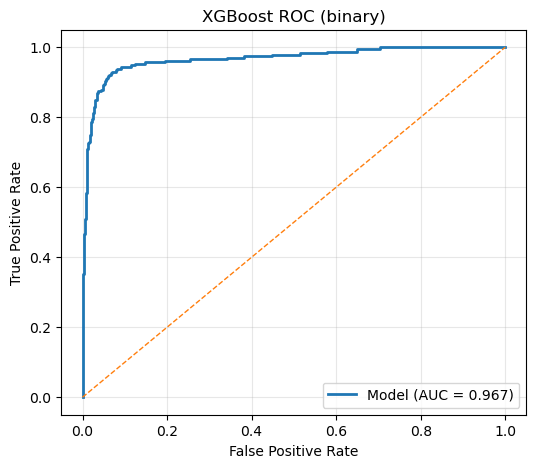

In [738]:
plot_roc_binary(fitted_models["Xgboost"], X_test, y_test, title="XGBoost ROC (binary)")

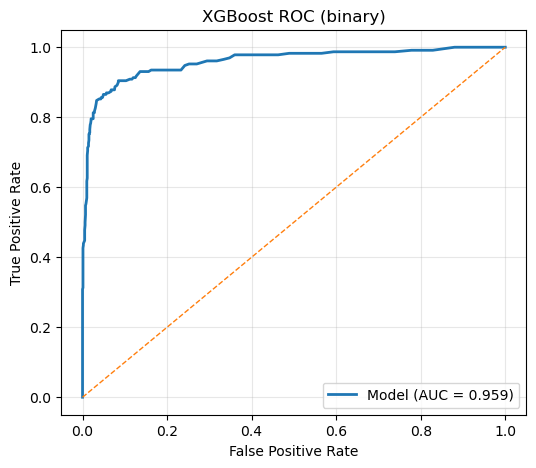

In [740]:
plot_roc_binary(fitted_models["RF"], X_test, y_test, title="XGBoost ROC (binary)")